# Just operation policies

In [1]:
from ema_workbench import (Model, RealParameter, ScalarOutcome,
                           MultiprocessingEvaluator, ema_logging,
                           Constant, Scenario, Constraint,optimize)

import random
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
import warnings

warnings.filterwarnings("ignore")

from AMG_function import AMG_model_function, AMG_model_function_int
from functions_data import full_dataframe
from AMG_drought_indicator import get_drought_state

#testing the model function
outcomes = AMG_model_function(chapala_flow= 7.1, calderon_lared_flow= 0, pozos_flow= 2.2, toluquilla_flow= 0.4, 
                aqp1_PP2_to_PP3=0.2, aqp2_PP3_to_Pozos=-0.71, aqp3_Pozos_to_Toluquilla=-0.6, aqp4_Toluquilla_to_PP1=-0.6,
                rounding_outcomes=2,
                rounding_levers=2)
print(outcomes)

{'delivered_PP1': 5.751, 'delivered_PP2': 1.349, 'delivered_PP3': 0, 'delivered_Pozos': 2.2, 'delivered_Toluquilla': 0.4, 'demand_PP1': 2.932923333333333, 'demand_PP2': 0.7571686458333333, 'demand_PP3': 0.9435108680555555, 'demand_Toluquilla': 0.782294375, 'demand_Pozos': 1.2014250347222222, 'supplied_PP1': 2.6693019600000003, 'supplied_PP2': 0.6854705, 'supplied_PP3': 0.8775000000000001, 'supplied_Toluquilla': 0.68757754, 'supplied_Pozos': 1.0439000000000003, 'total_supplied': 5.963750000000001, 'supplied_demand_PP1': 0.9101165140127543, 'supplied_demand_PP2': 0.9053075609669191, 'supplied_demand_PP3': 0.9300369817768028, 'supplied_demand_Toluquilla': 0.8789243051888237, 'supplied_demand_Pozos': 0.8688848407769005, 'supplied_demand_deficit_PP1': 0.08988348598724571, 'supplied_demand_deficit_PP2': 0.09469243903308089, 'supplied_demand_deficit_PP3': 0.06996301822319717, 'supplied_demand_deficit_Toluquilla': 0.1210756948111763, 'supplied_demand_deficit_Pozos': 0.13111515922309946, 'suppl

In [2]:
from AMG_optimization import run_optimization
from functions_data import find_best_policies_for_specified_objectives
from functions_viz import visualize_best_policies

#Problem formulation
performance_outcomes = {"supplied_demand_deficit":True,
                          "supplied_demand":False,
                          "supply_percapita":False}

justice_outcomes = {"supplied_demand_GINI":False,
                      "supply_percapita_GINI":False,
                      "supply_percapita_average":False,
                      "ZAs_below_142":False,
                      "ZAs_below_128":False,
                      "ZAs_below_100":False,
                      "ZAs_below_50":False}

other_outcomes = {"energy_costs":True}


#Model Parameters
n_nfe = 1000
epsilon = 0.04
seed = 1

#Scenario setting

scenario_adhocr = {"name":"adhoc",'chapala_flow' : 6.9, 'calderon_lared_flow' : 1, 'pozos_flow' : 2.3, 'toluquilla_flow' : 0.5}

representative_scenarios_df = pd.read_csv("results/representative_scenarios.csv", index_col=0)

scenario_name = "chapala_incident"
scenario = representative_scenarios_df.loc[scenario_name,:].to_dict()


all_outcomes = {**performance_outcomes, **justice_outcomes, **other_outcomes}
experiment_name = "DST"


results  = run_optimization(experiment_name=experiment_name, 
                 outcomes= all_outcomes,
                 n_nfe = n_nfe, epsilon = epsilon, seed = seed,
                 scenario=scenario, scenario_name=scenario_name,model_function= AMG_model_function,
                 restriction = True)

full_results_df = full_dataframe(results,scenarios_in_dataframe=False, scenario = scenario)
full_results_df.to_csv("results/adhoc_optimization_DST.csv", index=False)


full_results_df.head()



Scenario({'chapala_flow': 1.8, 'calderon_lared_flow': 1.0, 'pozos_flow': 2.2, 'toluquilla_flow': 0.4})
['supplied_demand_deficit', 'energy_costs']


[MainProcess/INFO] pool started with 8 workers
1082it [00:05, 196.65it/s]                                                     
[MainProcess/INFO] optimization completed, found 185 solutions
[MainProcess/INFO] terminating pool


,aqp4_Toluquilla_to_PP1,aqp1_PP2_to_PP3,aqp2_PP3_to_Pozos,aqp3_Pozos_to_Toluquilla,delivered_PP1,delivered_PP2,delivered_PP3,delivered_Pozos,delivered_Toluquilla,demand_PP1,...,supply_percapita_average,min_supplied_demand,supply_percapita_GINI,supplied_demand_GINI,energy_costs,ZAs_below_142,ZAs_below_100,ZAs_below_50,ZAs_below_128,experiment_name
0,-0.134466,-0.812281,-0.943305,-0.164235,1.458,0.342,1.0,2.2,0.4,2.932923,...,96.658484,0.234645,0.267293,0.263967,0.513572,3.0,3.0,1.0,3.0,DST
1,-0.171372,-0.930948,-0.514520,-0.202596,1.458,0.342,1.0,2.2,0.4,2.932923,...,94.977544,0.226465,0.241320,0.251880,0.454859,4.0,2.0,1.0,4.0,DST
2,-0.574064,-0.830640,-0.660612,-0.089012,1.458,0.342,1.0,2.2,0.4,2.932923,...,103.449634,0.137220,0.220890,0.227337,0.538582,4.0,2.0,1.0,2.0,DST
3,0.207965,-0.319430,-0.417569,-0.132580,1.458,0.342,1.0,2.2,0.4,2.932923,...,86.153563,0.197891,0.298161,0.294334,0.269386,4.0,3.0,2.0,4.0,DST
4,0.128894,-0.836513,-0.466553,-0.109232,1.458,0.342,1.0,2.2,0.4,2.932923,...,89.928863,0.282990,0.238678,0.248517,0.385298,4.0,2.0,2.0,4.0,DST


In [3]:
full_results_df.head()

,aqp4_Toluquilla_to_PP1,aqp1_PP2_to_PP3,aqp2_PP3_to_Pozos,aqp3_Pozos_to_Toluquilla,delivered_PP1,delivered_PP2,delivered_PP3,delivered_Pozos,delivered_Toluquilla,demand_PP1,...,supply_percapita_average,min_supplied_demand,supply_percapita_GINI,supplied_demand_GINI,energy_costs,ZAs_below_142,ZAs_below_100,ZAs_below_50,ZAs_below_128,experiment_name
0,-0.134466,-0.812281,-0.943305,-0.164235,1.458,0.342,1.0,2.2,0.4,2.932923,...,96.658484,0.234645,0.267293,0.263967,0.513572,3.0,3.0,1.0,3.0,DST
1,-0.171372,-0.930948,-0.514520,-0.202596,1.458,0.342,1.0,2.2,0.4,2.932923,...,94.977544,0.226465,0.241320,0.251880,0.454859,4.0,2.0,1.0,4.0,DST
2,-0.574064,-0.830640,-0.660612,-0.089012,1.458,0.342,1.0,2.2,0.4,2.932923,...,103.449634,0.137220,0.220890,0.227337,0.538582,4.0,2.0,1.0,2.0,DST
3,0.207965,-0.319430,-0.417569,-0.132580,1.458,0.342,1.0,2.2,0.4,2.932923,...,86.153563,0.197891,0.298161,0.294334,0.269386,4.0,3.0,2.0,4.0,DST
4,0.128894,-0.836513,-0.466553,-0.109232,1.458,0.342,1.0,2.2,0.4,2.932923,...,89.928863,0.282990,0.238678,0.248517,0.385298,4.0,2.0,2.0,4.0,DST


In [8]:
# Example usage
objectives_dict = {
    'supplied_demand_deficit_PP1': False,
    'supplied_demand_deficit_PP2': False,
    'supplied_demand_deficit_PP3': False,
    'supplied_demand_deficit_Toluquilla': False,
    'supplied_demand_deficit_Pozos': False,
    'supplied_demand_GINI': False,
    'supply_percapita_GINI': False,
    'energy_costs': False,
    'supplied_demand_PP1': False,
    'supplied_demand_PP2': False,
    'supplied_demand_PP3': False,
    'supplied_demand_Toluquilla': False,
    'supplied_demand_Pozos': False,
    'supply_percapita_average': False,
    "supply_percapita_PP1": True
}

full_results_df = pd.read_csv("results/adhoc_optimization_DST.csv")

best_policies_df = find_best_policies_for_specified_objectives(full_results_df, objectives_dict, scenario)


visualize_best_policies(best_policies_df, objectives_dict)

KeyError: "['supply_percapita_PP1_max'] not in index"

Best Performing Policies DataFrame:
     aqp4_Toluquilla_to_PP1  aqp1_PP2_to_PP3  aqp2_PP3_to_Pozos  \
64                 0.565401        -0.598294          -0.344519   
116                0.565401        -0.598294          -0.089601   
119                0.565401        -0.846456          -0.089601   
185                0.000000         0.000000           0.000000   

     aqp3_Pozos_to_Toluquilla  delivered_PP1  delivered_PP2  delivered_PP3  \
64                  -0.010425          1.458          0.342            1.0   
116                 -0.007492          1.458          0.342            1.0   
119                 -0.012899          1.458          0.342            1.0   
185                  0.000000          1.458          0.342            1.0   

     delivered_Pozos  delivered_Toluquilla  demand_PP1  ...  \
64               2.2                   0.4    2.932923  ...   
116              2.2                   0.4    2.932923  ...   
119              2.2                   0.4    2.

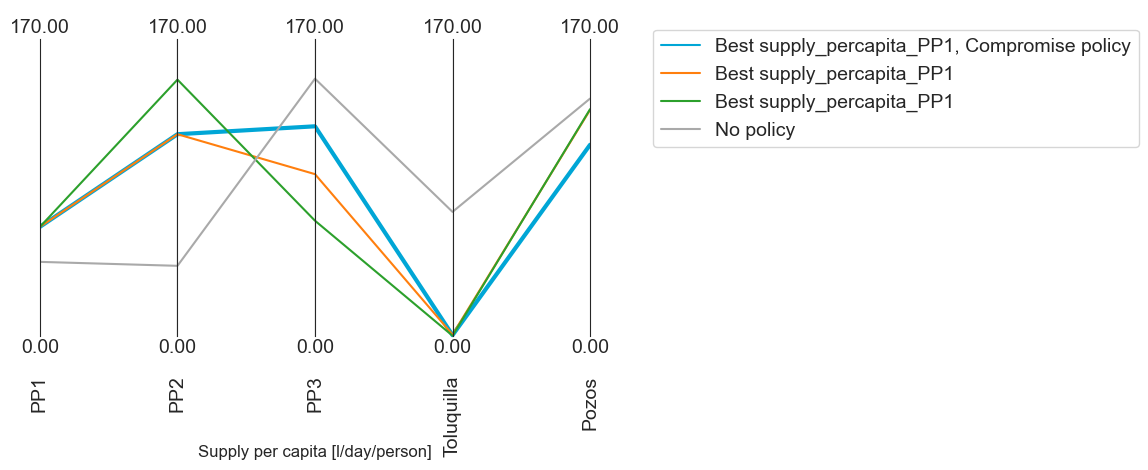

([64, 116, 119, 185],
 64     Best supply_percapita_PP1, Compromise policy
 116                       Best supply_percapita_PP1
 119                       Best supply_percapita_PP1
 185                                       No policy
 Name: policy_labels, dtype: object)

In [5]:
import matplotlib.pyplot as plt
import seaborn as sns
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import colormaps, cm
from matplotlib.collections import PatchCollection
from matplotlib.patches import Rectangle
from matplotlib.lines import Line2D
from pandas.plotting import parallel_coordinates
from ema_workbench.analysis import parcoords
import matplotlib.pyplot as plt
 

def visualize_best_policies(best_policies_df, objectives_dict):
    ZA_names = ["PP1", "PP2", "PP3", "Toluquilla", "Pozos"]

    # Identify the columns that indicate best performance (ending in '_min', '_max', or '_compromise')
    objectives_min = ['supplied_demand_deficit_PP1',
                      'supplied_demand_deficit_PP2', 
                      'supplied_demand_deficit_PP3',
                      'supplied_demand_deficit_Toluquilla', 
                      'supplied_demand_deficit_Pozos',
                      "supplied_demand_GINI",
                      "supply_percapita_GINI",
                      "energy_costs"]

    objectives_max = ['supplied_demand_PP1', 
                      'supplied_demand_PP2', 
                      'supplied_demand_PP3',
                      'supplied_demand_Toluquilla', 
                      'supplied_demand_Pozos',
                      'supply_percapita_PP1', 
                      'supply_percapita_PP2', 
                      'supply_percapita_PP3',
                      'supply_percapita_Toluquilla', 
                      'supply_percapita_Pozos', 
                      "supply_percapita_average"]
    
    # Ensure that the null policy will always be displayed
    best_performance_columns = ["no_policy"]

    for obj in objectives_dict.keys():
        if objectives_dict[obj]:
            if obj in objectives_min:
                best_performance_columns.append(f"{obj}_min")
            elif obj in objectives_max:
                best_performance_columns.append(f"{obj}_max")
            best_performance_columns.append(f"{obj}_compromise")

    # Create a dictionary for labeling the policies
    policy_labels = {
        f"{obj}_min": f"Best {obj}" for obj in objectives_dict.keys() if objectives_dict[obj] and obj in objectives_min
    }
    policy_labels.update({
        f"{obj}_max": f"Best {obj}" for obj in objectives_dict.keys() if objectives_dict[obj] and obj in objectives_max
    })
    policy_labels.update({
        f"{obj}_compromise": f"Compromise policy" for obj in objectives_dict.keys() if objectives_dict[obj]
    })
    policy_labels.update({
        "no_policy": "No policy"
    })

    # Filter rows where at least one of the best performance columns is True
    best_performing_policies_df = best_policies_df[best_policies_df[best_performance_columns].any(axis=1)]

    # Debugging: print the best_performing_policies_df to check if it's populated correctly
    print("Best Performing Policies DataFrame:")
    print(best_performing_policies_df)

    # Create a dictionary to map index to labels
    index_labels = {}
    for col, label in policy_labels.items():
        indices = best_performing_policies_df[best_performing_policies_df[col] == True].index
        for idx in indices:
            if idx in index_labels:
                index_labels[idx] += f", {label}"
            else:
                index_labels[idx] = label

    # Add a new column for policy labels
    best_performing_policies_df['policy_labels'] = best_performing_policies_df.index.map(index_labels)

    # Select the supply per capita columns for the five zones of analysis (ZA)
    supply_per_capita_columns = [
        'supply_percapita_PP1', 'supply_percapita_PP2', 'supply_percapita_PP3',
        'supply_percapita_Toluquilla', 'supply_percapita_Pozos'
    ]
    data = best_performing_policies_df[supply_per_capita_columns]

    # Debugging: print the data to be plotted
    print("Data to be plotted:")
    print(data)

    # Get limits for parallel coordinates plot
    limits = pd.read_csv("results/limits.csv")

    # Create the parallel axes plot
    paraxes = parcoords.ParallelAxes(limits)

    # Plot each row
    colors = plt.cm.tab10.colors
    for i, (index, row) in enumerate(data.iterrows()):
        label = index_labels.get(index, str(index))
        if 'Compromise policy' in label:
            paraxes.plot(row.to_frame().T, label=label, color='#00A6D6', linewidth=3)
        else:
            color = 'darkgrey' if 'No policy' in label else colors[i % len(colors)]
            paraxes.plot(row.to_frame().T, label=label, color=color)

    # Add x-axis label
    paraxes.fig.text(0.5, 0.04, 'Supply per capita [l/day/person]', ha='center', va='center', fontsize="large")

    # Update axis labels
    for ax in paraxes.axes:
        labels = [label.get_text().replace('supply_percapita_', '') for label in ax.get_xticklabels()]
        ax.set_xticklabels(labels)

    # Add legend and show plot
    paraxes.legend()
    plt.show()
    
    return best_performing_policies_df.index.tolist(), best_performing_policies_df['policy_labels']


visualize_best_policies(best_policies_df, objectives_dict)

In [6]:
def find_best_policies_for_specified_objectives(df, objectives_dict, scenario):
    df_copy = df.copy()  # To avoid modifying the original DataFrame

    objectives_min = ['supplied_demand_deficit_PP1',
                      'supplied_demand_deficit_PP2', 
                      'supplied_demand_deficit_PP3',
                      'supplied_demand_deficit_Toluquilla', 
                      'supplied_demand_deficit_Pozos',
                      "supplied_demand_GINI",
                      "supply_percapita_GINI",
                      "energy_costs"]

    objectives_max = ['supplied_demand_PP1', 
                      'supplied_demand_PP2', 
                      'supplied_demand_PP3',
                      'supplied_demand_Toluquilla', 
                      'supplied_demand_Pozos',
                      'supply_percapita_PP1', 
                      'supply_percapita_PP2', 
                      'supply_percapita_PP3',
                      'supply_percapita_Toluquilla', 
                      'supply_percapita_Pozos', 
                      "supply_percapita_average"]
    
    # Filter objectives based on the dictionary
    selected_objectives = [obj for obj, use in objectives_dict.items() if use]

    # Add columns to the DataFrame for min or max, and compromise objectives only
    for obj in selected_objectives:
        if obj in objectives_min:
            df_copy[f'{obj}_min'] = False
        elif obj in objectives_max:
            df_copy[f'{obj}_max'] = False
        df_copy[f'{obj}_compromise'] = False
    
    # Determine if each objective should find the min or max
    for obj in selected_objectives:
        if obj in objectives_min:
            min_value = df_copy[obj].min()
            min_indices = df_copy[df_copy[obj] == min_value].index
            df_copy.loc[min_indices, f'{obj}_min'] = True
        elif obj in objectives_max:
            max_value = df_copy[obj].max()
            max_indices = df_copy[df_copy[obj] == max_value].index
            df_copy.loc[max_indices, f'{obj}_max'] = True
    
    # Find the compromise solution
    compromise_index = find_compromise(df_copy[selected_objectives])
    if compromise_index is not None:
        df_copy.loc[compromise_index, [f'{obj}_compromise' for obj in selected_objectives]] = True

    # Add a "No Policy" row with all AQP flows set to zero
    no_policy_flows = {'aqp1_PP2_to_PP3': 0, 'aqp2_PP3_to_Pozos': 0, 'aqp3_Pozos_to_Toluquilla': 0, 'aqp4_Toluquilla_to_PP1': 0}
    no_policy_row = AMG_model_function(**scenario, **no_policy_flows)
    
    # Create a column to identify the "no policy" policy
    df_copy["no_policy"] = False
    no_policy_row["no_policy"] = True
    df_copy = df_copy.append(no_policy_row, ignore_index=True)
    df_copy.fillna(0, inplace=True)

    return df_copy

def find_compromise(refSet):

    objectives_min = ['supplied_demand_deficit_PP1',
                      'supplied_demand_deficit_PP2', 
                      'supplied_demand_deficit_PP3',
                      'supplied_demand_deficit_Toluquilla', 
                      'supplied_demand_deficit_Pozos',
                      "supplied_demand_GINI",
                      "supply_percapita_GINI",
                      "energy_costs"]

    objectives_max = ['supplied_demand_PP1', 
                      'supplied_demand_PP2', 
                      'supplied_demand_PP3',
                      'supplied_demand_Toluquilla', 
                      'supplied_demand_Pozos',
                      'supply_percapita_PP1', 
                      'supply_percapita_PP2', 
                      'supply_percapita_PP3',
                      'supply_percapita_Toluquilla', 
                      'supply_percapita_Pozos', 
                      "supply_percapita_average"]
    
    nobjs = refSet.shape[1]
    normObjs = np.zeros(refSet.shape)

    for i in range(refSet.shape[0]):
        for j in range(nobjs):
            if refSet.columns[j] in objectives_max:
                normObjs[i, j] = (-refSet.iloc[i, j] + refSet.iloc[:, j].mean()) / refSet.iloc[:, j].std()
            elif refSet.columns[j] in objectives_min:
                normObjs[i, j] = (-refSet.iloc[:, j].mean() + refSet.iloc[i, j]) / refSet.iloc[:, j].std()

    dists = np.zeros(refSet.shape[0])
    for i in range(len(dists)):
        for j in range(nobjs):
            dists[i] += (normObjs[i, j] - np.min(normObjs[:, j])) ** 2

    compromise = np.argmin(dists)
    return compromise


# Example usage
'''objectives_dict = {
    'supplied_demand_deficit_PP1': False,
    'supplied_demand_deficit_PP2': False,
    'supplied_demand_deficit_PP3': False,
    'supplied_demand_deficit_Toluquilla': False,
    'supplied_demand_deficit_Pozos': False,
    'supplied_demand_GINI': True,
    'supply_percapita_GINI': False,
    'energy_costs': False,
    'supplied_demand_PP1': False,
    'supplied_demand_PP2': False,
    'supplied_demand_PP3': False,
    'supplied_demand_Toluquilla': False,
    'supplied_demand_Pozos': False,
    'supply_percapita_average': False,
    "supply_percapita_PP1": True
}'''

# Load the corresponding CSV file for the selected scenario
csv_file_path = f"results/optimization_results_sd1ep0.04nfe20000.csv"
full_optimization_results = pd.read_csv(csv_file_path, index_col="policy")
scenario_name = "chapala_incident"
full_optimization_results = full_optimization_results.loc[full_optimization_results["experiment_name"] == "Sup. Dem. Deficit, Energy & Sup. PerCap. GINI"]
full_optimization_results = full_optimization_results.loc[full_optimization_results["scenario"] == scenario_name]

# Extract the scenario details from the dataframe
flows = ["chapala_flow", "calderon_lared_flow", "pozos_flow", "toluquilla_flow"]
scenario = representative_scenarios_df.loc[scenario_name, flows].to_dict()

# Find the best policies
best_policies_df = find_best_policies_for_specified_objectives(full_optimization_results, objectives_dict, scenario)
best_policies_df.to_clipboard()
best_policies_df.head()


,Unnamed: 0,aqp4_Toluquilla_to_PP1,aqp1_PP2_to_PP3,aqp2_PP3_to_Pozos,aqp3_Pozos_to_Toluquilla,delivered_PP1,delivered_PP2,delivered_PP3,delivered_Pozos,delivered_Toluquilla,...,ZAs_below_100,ZAs_below_50,ZAs_below_128,experiment_name,scenario,seed,duration,supply_percapita_PP1_max,supply_percapita_PP1_compromise,no_policy
0,2133.0,-0.134466,-0.812281,-0.943305,-0.164235,1.458,0.342,1.0,2.2,0.4,...,3.0,1.0,3.0,"Sup. Dem. Deficit, Energy & Sup. PerCap. GINI",chapala_incident,1.0,375.0,False,False,False
1,2134.0,0.374220,-0.670902,-0.312300,-0.121298,1.458,0.342,1.0,2.2,0.4,...,2.0,1.0,5.0,"Sup. Dem. Deficit, Energy & Sup. PerCap. GINI",chapala_incident,1.0,375.0,False,False,False
2,2135.0,-0.204405,-0.743456,-0.612625,-0.171066,1.458,0.342,1.0,2.2,0.4,...,2.0,1.0,3.0,"Sup. Dem. Deficit, Energy & Sup. PerCap. GINI",chapala_incident,1.0,375.0,False,False,False
3,2136.0,-0.317238,-0.596854,-0.481774,-0.171066,1.458,0.342,1.0,2.2,0.4,...,2.0,1.0,4.0,"Sup. Dem. Deficit, Energy & Sup. PerCap. GINI",chapala_incident,1.0,375.0,False,False,False
4,2137.0,-0.115479,-0.484062,-0.000343,-0.120590,1.458,0.342,1.0,2.2,0.4,...,3.0,1.0,4.0,"Sup. Dem. Deficit, Energy & Sup. PerCap. GINI",chapala_incident,1.0,375.0,False,False,False


In [7]:
def find_best_policies_for_specified_objectives(df, objectives_dict, scenario):
    df_copy = df.copy()  # To avoid modifying the original DataFrame

    objectives_min = ['supplied_demand_deficit_PP1',
                      'supplied_demand_deficit_PP2', 
                      'supplied_demand_deficit_PP3',
                      'supplied_demand_deficit_Toluquilla', 
                      'supplied_demand_deficit_Pozos',
                      "supplied_demand_GINI",
                      "supply_percapita_GINI",
                      "energy_costs"]

    objectives_max = ['supplied_demand_PP1', 
                      'supplied_demand_PP2', 
                      'supplied_demand_PP3',
                      'supplied_demand_Toluquilla', 
                      'supplied_demand_Pozos', 
                      "supply_percapita_average"]
    
    # Filter objectives based on the dictionary
    selected_objectives = [obj for obj, use in objectives_dict.items() if use]

    # Add columns to the DataFrame for min or max, and compromise objectives only
    for obj in selected_objectives:
        if obj in objectives_min:
            df_copy[f'{obj}_min'] = False
        elif obj in objectives_max:
            df_copy[f'{obj}_max'] = False
        df_copy[f'{obj}_compromise'] = False
    
    # Determine if each objective should find the min or max
    for obj in selected_objectives:
        if obj in objectives_min:
            min_value = df_copy[obj].min()
            min_indices = df_copy[df_copy[obj] == min_value].index
            df_copy.loc[min_indices, f'{obj}_min'] = True
        elif obj in objectives_max:
            max_value = df_copy[obj].max()
            max_indices = df_copy[df_copy[obj] == max_value].index
            df_copy.loc[max_indices, f'{obj}_max'] = True
    
    # Find the compromise solution
    compromise_index = find_compromise(df_copy[selected_objectives])
    if compromise_index is not None:
        df_copy.loc[compromise_index, [f'{obj}_compromise' for obj in selected_objectives]] = True

    # Add a "No Policy" row with all AQP flows set to zero
    no_policy_flows = {'aqp1_PP2_to_PP3':0, 'aqp2_PP3_to_Pozos':0, 'aqp3_Pozos_to_Toluquilla':0, 'aqp4_Toluquilla_to_PP1':0}
    no_policy_row = AMG_model_function(**scenario,**no_policy_flows)
    
    #Create a column to identify the "no policy" policy
    df_copy["no_policy"] = False
    no_policy_row["no_policy"]=True
    df_copy = df_copy.append(no_policy_row, ignore_index=True)
    df_copy.fillna(0, inplace=True)

    return df_copy